Gradient Descent

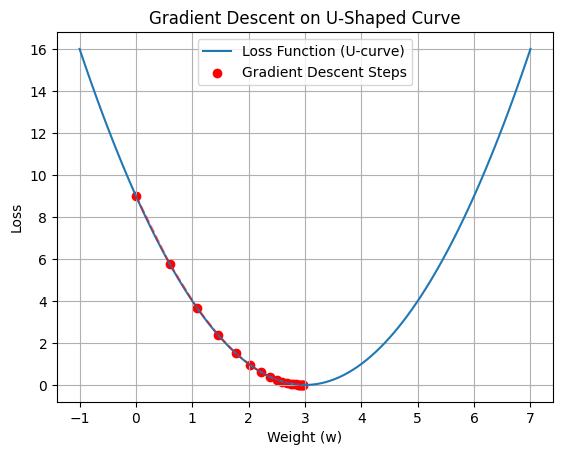

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the loss function and its derivative
def loss(w): return (w - 3) ** 2
def grad(w): return 2 * (w - 3)

# Gradient descent loop
w = 0  # Initial weight
alpha = 0.1
weights = [w]
losses = [loss(w)]

for i in range(20):
    w = w - alpha * grad(w)
    weights.append(w)
    losses.append(loss(w))

# Plot
w_vals = np.linspace(-1, 7, 100)
loss_vals = loss(w_vals)

plt.plot(w_vals, loss_vals, label="Loss Function (U-curve)")
plt.scatter(weights, losses, color='red', label="Gradient Descent Steps")
plt.plot(weights, losses, color='red', linestyle='--', alpha=0.5)
plt.title("Gradient Descent ")
plt.xlabel("Weight (w)")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

Bagging with Random Forest

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging using Random Forest
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


XGBoost

In [4]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = xgb.XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))

XGBoost Accuracy: 0.9707602339181286


CatBoost


In [7]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [8]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))

CatBoost Accuracy: 0.9766081871345029


Kmeans

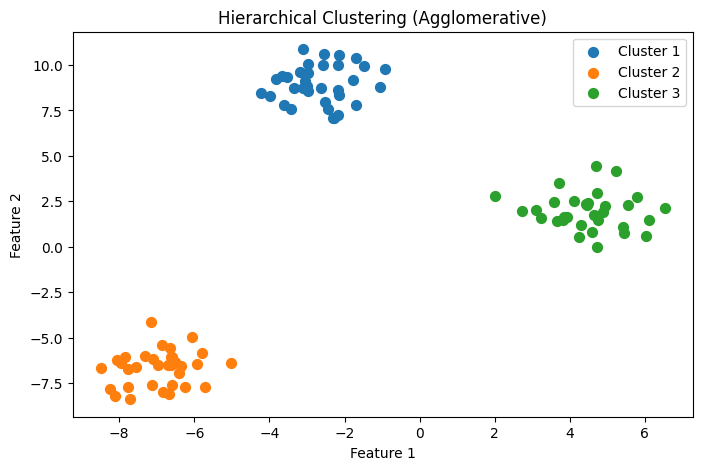

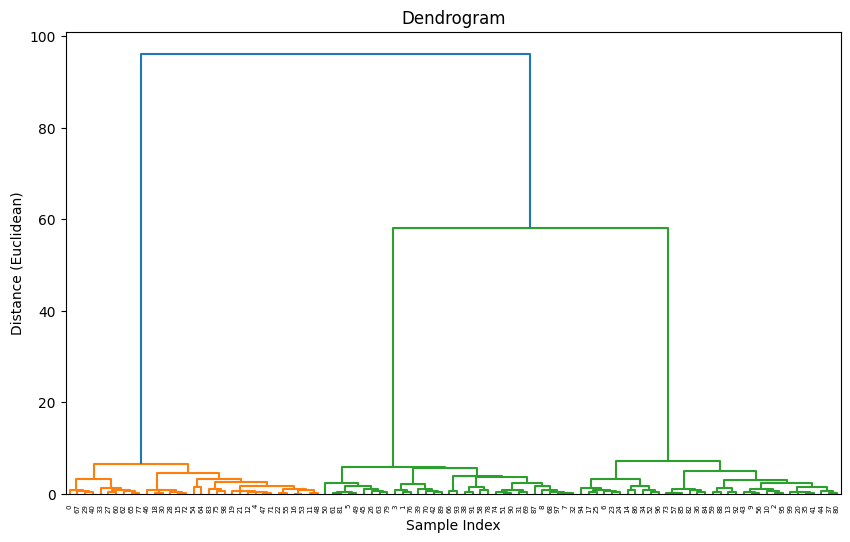

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 1: Generate sample data
X, y = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Step 2: Perform Agglomerative Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X)

# Step 3: Plot clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=50, label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=50, label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=50, label='Cluster 3')
plt.title('Hierarchical Clustering (Agglomerative)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Step 4: Plot the Dendrogram
plt.figure(figsize=(10, 6))
Z = linkage(X, method='ward')  # create linkage matrix
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance (Euclidean)")
plt.show()

Cluster labels: [1 1 1 0 0 0]


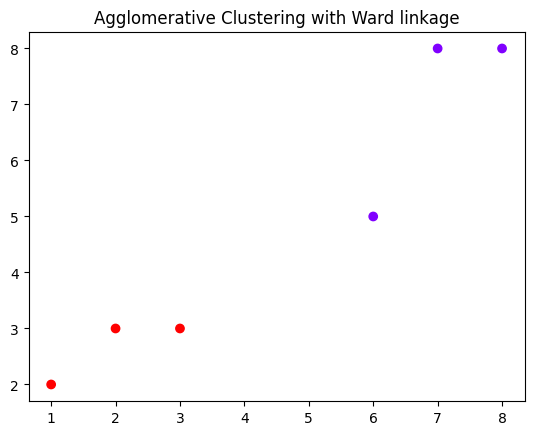

In [11]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

# Sample data (2D array)
X = np.array([[1, 2],
              [2, 3],
              [3, 3],
              [6, 5],
              [7, 8],
              [8, 8]])

# Agglomerative Clustering with linkage='ward' (No affinity parameter)
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
model.fit(X)

# Labels for each point
print("Cluster labels:", model.labels_)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap='rainbow')
plt.title('Agglomerative Clustering with Ward linkage')
plt.show()


kmeans - Scaling


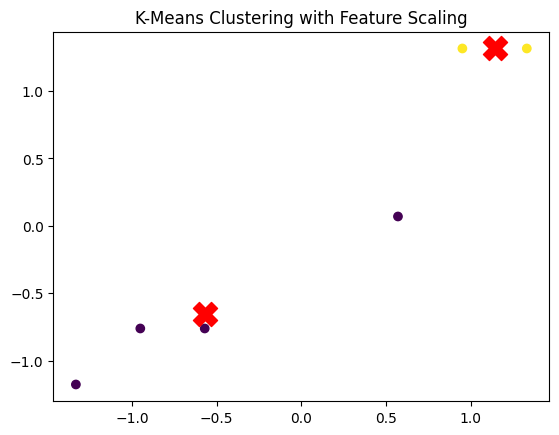

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Example data (Unscaled)
X = np.array([[1, 2],
              [2, 3],
              [3, 3],
              [6, 5],
              [7, 8],
              [8, 8]])

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plotting the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering with Feature Scaling")
plt.show()

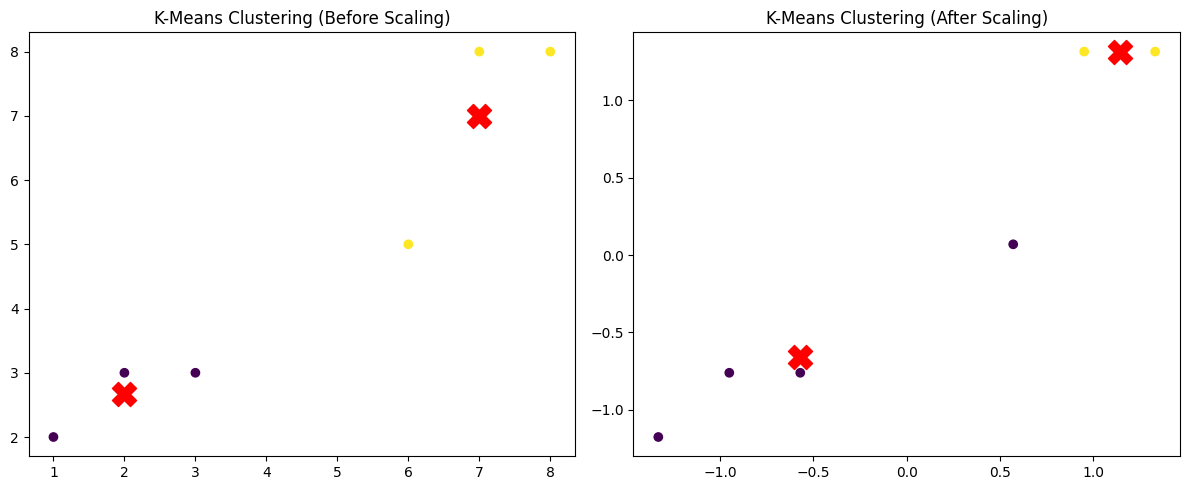

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Sample Data (Before Scaling)
X = np.array([[1, 2],
              [2, 3],
              [3, 3],
              [6, 5],
              [7, 8],
              [8, 8]])

# --- Before Scaling ---
# Applying KMeans clustering on unscaled data
kmeans_before = KMeans(n_clusters=2, random_state=42)
y_kmeans_before = kmeans_before.fit_predict(X)

# Plotting the clusters before scaling
plt.figure(figsize=(12, 5))

# Plot 1: Before scaling
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans_before, cmap='viridis')
plt.scatter(kmeans_before.cluster_centers_[:, 0], kmeans_before.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering (Before Scaling)")

# --- After Scaling ---
# Scaling the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying KMeans clustering on scaled data
kmeans_after = KMeans(n_clusters=2, random_state=42)
y_kmeans_after = kmeans_after.fit_predict(X_scaled)

# Plotting the clusters after scaling
# Plot 2: After scaling
plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans_after, cmap='viridis')
plt.scatter(kmeans_after.cluster_centers_[:, 0], kmeans_after.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title("K-Means Clustering (After Scaling)")

plt.tight_layout()
plt.show()

Before Scaling: K-Means may not perform well when features are on different scales, leading to suboptimal clustering.

After Scaling: Standardizing the features helps K-Means to perform better because it removes the effect of differing feature scales, leading to more accurate clustering.

AgglomerativeClustering

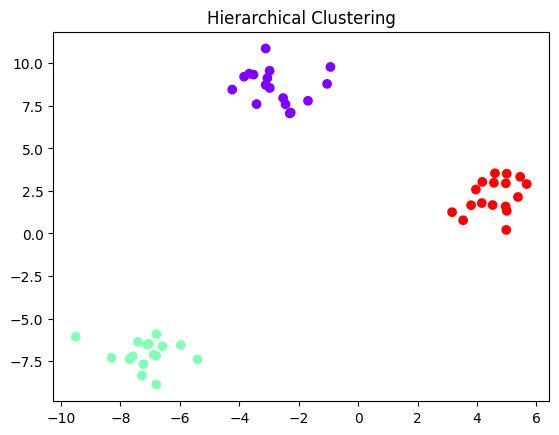

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Create sample data
X, y = make_blobs(n_samples=50, centers=3, random_state=42)

# Apply Hierarchical clustering
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Hierarchical Clustering")
plt.show()


PCA

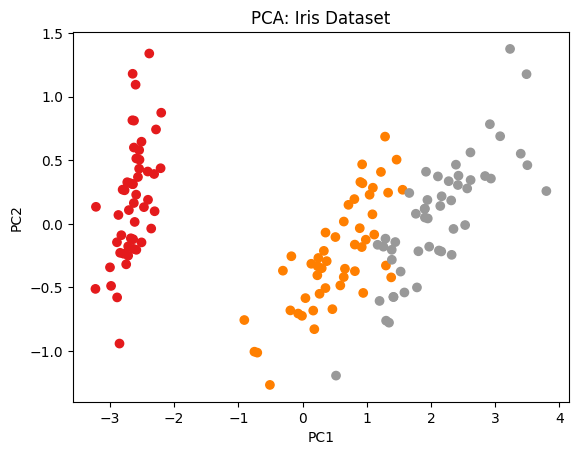

In [2]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data

# Reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='Set1')
plt.title("PCA: Iris Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


PCA(n_components=2): We're reducing the 4D feature space to 2 dimensions.

.fit_transform(X): Fits the PCA model to the data and transforms it into 2 components.

X_pca: A new array of shape [150, 2], where each sample is now represented by 2 principal components (PC1 and PC2).

Kernel PCA

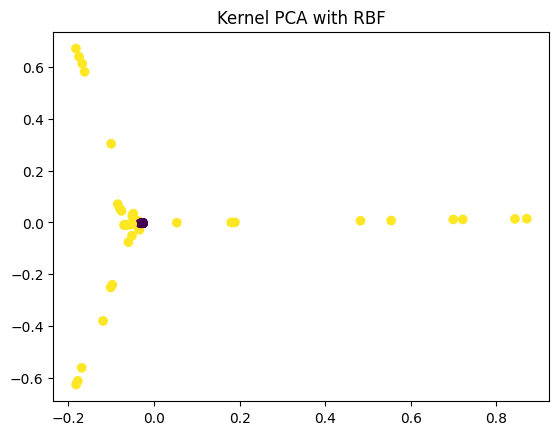

In [5]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, factor=0.3, noise=0.05)
kpca = KernelPCA(kernel="rbf", gamma=15)
X_kpca = kpca.fit_transform(X)

plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y)
plt.title("Kernel PCA with RBF")
plt.show()


KernelPCA: A non-linear form of PCA that uses kernels to map data to a higher-dimensional space.

make_circles: Generates a synthetic 2D dataset of points arranged in two concentric circles
kernel="rbf": Radial Basis Function — a popular choice to handle non-linear separation.

gamma=15: Controls how much influence a single training example has. Higher values = tighter curves around the data.

fit_transform(X): Fits the model to the data and transforms it to a new space (usually 2D here).

👉 X_kpca: Shape (100, 2), now your original 2D data has been non-linearly transformed and projected into a new 2D space where it might be linearly separable.

X_kpca[:, 0]: First kernel principal component.

X_kpca[:, 1]: Second kernel principal component.

c=y: Colors the points according to their class (circle 0 or circle 1).

plt.show(): Displays the plot.

Random Projections

In [8]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
rp = GaussianRandomProjection(n_components=10, random_state=42)
X_rp = rp.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_rp.shape)
print("First image (original 64 features):\n", X[0])
print("First image (reduced 10  features):\n", X_rp[0])


Original shape: (1797, 64)
Reduced shape: (1797, 10)
First image (original 64 features):
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
First image (reduced 10  features):
 [-30.52964082   0.13450048  -1.90274304  18.03694744  12.70305993
   3.39235519  16.26763501   4.95441891   0.95552131   9.87152327]
